## Delivery_time -> Predict delivery time using sorting time 

#### Importing necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings
%matplotlib inline

#### Reading the dataset

In [2]:
df = pd.read_csv("delivery_time.csv")
df.head(10)

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


#### Shape of dataset

In [3]:
df.shape

(21, 2)

#### Information of dataset 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


#### Description of dataset

In [5]:
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


#### Visualizing the dataset

C:\Users\D_R\anaconda3\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


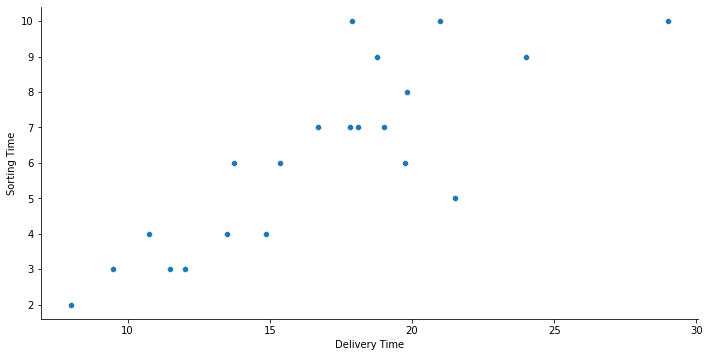

In [6]:
sns.pairplot(df, x_vars = ['Delivery Time'], y_vars = 'Sorting Time', size = 5, aspect = 2, kind = 'scatter')

#### Visualizing the dataset using Heatmap

<AxesSubplot:>

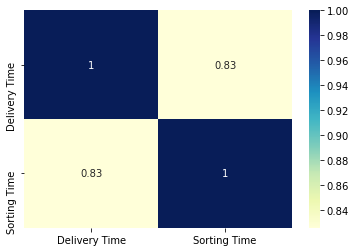

In [7]:
sns.heatmap(df.corr(), cmap = 'YlGnBu', annot = True)

###### We'll assign Sorting time as X and Delivery time as Y

In [8]:
X = df['Sorting Time']
Y = df['Delivery Time']

#### Creating Train and Test sets
For this we will import sklearn  libraries 

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.7 ,test_size = 0.3, random_state = 100)

#### Overview of training set

In [11]:
X_train

1      4
9      9
17     7
12     7
5      6
2      6
4     10
14     3
10     8
16     6
15     4
7      3
3      9
8     10
Name: Sorting Time, dtype: int64

In [12]:
Y_train

1     13.50
9     18.75
17    18.11
12    16.68
5     15.35
2     19.75
4     29.00
14    12.03
10    19.83
16    13.75
15    14.88
7      9.50
3     24.00
8     17.90
Name: Delivery Time, dtype: float64

#### Building and training the model
For that we will import statsmodels library. 

In [13]:
import statsmodels.api as sm

#### Adding a constant for intercept

In [14]:
X_train_sm = sm.add_constant(X_train)

#### Fitting the regression line using 'OLS'

In [15]:
lr = sm.OLS(Y_train, X_train_sm).fit()
## Printing the parameters
lr.params

const           6.319649
Sorting Time    1.679945
dtype: float64

In [16]:
lr.summary()

C:\Users\D_R\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery Time   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     25.11
Date:                Thu, 09 Sep 2021   Prob (F-statistic):           0.000304
Time:                        22:34:31   Log-Likelihood:                -33.931
No. Observations:                  14   AIC:                             71.86
Df Residuals:                      12   BIC:                             73.14
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            6.3196      2.340      2.701      0.019       1.221      11.418
Sorting Time     1.6799      0.335      5.011      0.000       0.949       2.410
==============================================================================
Omnibus:                        0.589   Durbin-Watson:                   1.858
Prob(Omnibus):                  0.745   Jarque-Bera (JB):                0.166
Skew:                           0.259   Prob(JB):                        0.920
Kurtosis:                       2.872   Cond. No.                         21.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Y = C + mX = 6.3196 + 1.67 * Sorting Time 

#### Visualizing the regression line

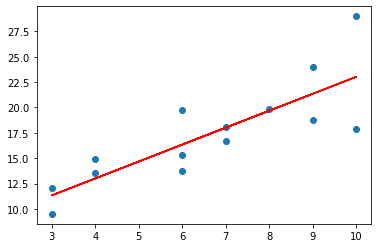

In [17]:
plt.scatter(X_train, Y_train)
plt.plot(X_train, 6.3196 + 1.67 * X_train, 'r')

So, we build a simple linear regression model using training data. 

#### Residual Analysis

Error = Actual Y value - Y predicted value

#### Predicting Y_value using training data of X

In [18]:
Y_train_pred = lr.predict(X_train_sm)

#### Creating residuals from Y_train data and Y_predicted data 

In [19]:
res = (Y_train - Y_train_pred)

#### Plotting histogram for residual to check if its normal distribution or not.

C:\Users\D_R\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Residuals')

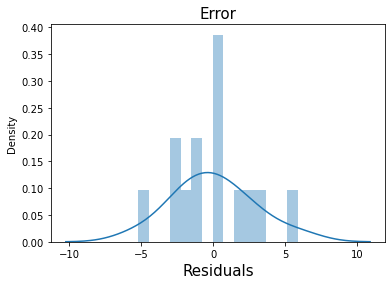

In [20]:
fig = plt.figure()
sns.distplot(res, bins= 15)
plt.title('Error', fontsize = 15)
plt.xlabel('Residuals', fontsize = 15)

Residuals are following the normal distribution graph with a mean 0.

#### Check if any patterns in the residuals occurs.

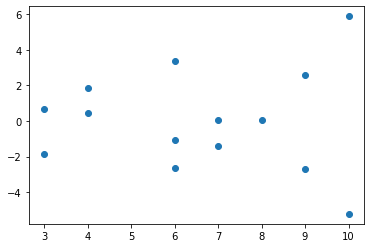

In [21]:
plt.scatter(X_train, res)

#### Predictions on the Test data

##### Adding a constant to X_test

In [22]:
X_test_sm = sm.add_constant(X_test)

##### Predicting Y values corresponding to X_test_sm

In [23]:
Y_test_pred = lr.predict(X_test_sm)

##### Showing Some Predicting values 

In [24]:
Y_test_pred

18     9.679539
20    14.719373
11    13.039428
19    18.079262
13    11.359483
6     18.079262
0     23.119096
dtype: float64

#### Calculating R-squared values for above predicted values
For that, we will import sklearn.metrics package 

In [25]:
from sklearn.metrics import r2_score

##### Checking the R-squared values

In [26]:
r_squared = r2_score(Y_test, Y_test_pred) 
r_squared

0.6670333670281537

R-squared value for training data = 0.667

R-squared value for testing data = 0.667

Since R-squared value of training data and testing data is equal, we can conclude that the model is perfectly stable. 

#### Visualizing the line on test data

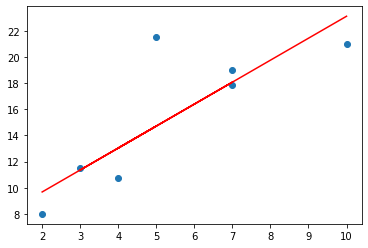

In [27]:
plt.scatter(X_test, Y_test)
plt.plot(X_test, Y_test_pred, 'r')

In [28]:
lr.params

const           6.319649
Sorting Time    1.679945
dtype: float64

In [47]:
df['Predicted'] = lr.fittedvalues
df

,Delivery Time,Sorting Time,Predicted
0,21.00,10,NaN
1,13.50,4,13.039428
2,19.75,6,16.399317
3,24.00,9,21.439151
4,29.00,10,23.119096
5,15.35,6,16.399317
6,19.00,7,NaN
7,9.50,3,11.359483
8,17.90,10,23.119096
9,18.75,9,21.439151


In [52]:
6.319649 + 1.679945 * 4

13.039429

In [54]:
6.319649 + 1.679945 * 6

16.399319

In [55]:
6.319649 + 1.679945 * 9

21.439154000000002

In [56]:
6.319649 + 1.679945 * 10

23.119099

In [61]:
df['Error'] = df['Delivery Time'] - df['Predicted']
df

,Delivery Time,Sorting Time,Predicted,Error
0,21.00,10,NaN,NaN
1,13.50,4,13.039428,0.460572
2,19.75,6,16.399317,3.350683
3,24.00,9,21.439151,2.560849
4,29.00,10,23.119096,5.880904
5,15.35,6,16.399317,-1.049317
6,19.00,7,NaN,NaN
7,9.50,3,11.359483,-1.859483
8,17.90,10,23.119096,-5.219096
9,18.75,9,21.439151,-2.689151
